# 📈 Predicción de Ventas con Modelos de Machine Learning

Este notebook tiene como objetivo desarrollar y evaluar modelos de Machine Learning para predecir las ventas de tiendas, utilizando el conjunto de datos **Rossmann Store Sales** disponible en [Kaggle](https://www.kaggle.com/competitions/rossmann-store-sales/overview).

---

## 📦 Fuente de los datos

El conjunto de datos fue descargado directamente desde Kaggle, y consta de dos archivos principales:

- `train.csv`: Contiene información histórica de ventas, promociones y otras variables relevantes por tienda y fecha.
- `store.csv`: Incluye detalles adicionales sobre cada tienda (tipo, competencia, promociones, etc.).

Ambos archivos fueron combinados usando el campo `Store` para enriquecer el dataset principal.

---

## 🧹 Preprocesamiento

Los pasos previos realizados en el notebook `eda.ipynb` incluyeron:

- Carga, unión y exploración de datos.
- Análisis de distribución y correlaciones.
- Detección de outliers con boxplots.
- Limpieza de valores faltantes mediante lógica de negocio.
- Transformación de variables categóricas y creación de nuevas variables.
- Separación en variables independientes (`X`) y dependiente (`y`).
- Escalado de características numéricas para ciertos modelos.

---

## 🧠 Objetivo del notebook

En este notebook aplicaremos distintos modelos de regresión para predecir la variable objetivo `Sales`:

1. **Random Forest Regressor**
2. **XGBoost Regressor**
3. **LightGBM Regressor**

Evaluaremos cada modelo utilizando métricas de desempeño como RMSE y R², y visualizaremos su rendimiento.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("df_model_ready.csv")

X = df_model.drop('Sales', axis=1)
y = df_model['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [60]:
# 🔍 Verificación paso a paso de variables clave

# Verifica si df_model está definido
try:
    print("✅ df_model cargado correctamente. Shape:", df_model.shape)
except NameError:
    print("❌ df_model no está definido. Asegúrate de ejecutar la celda que carga el archivo CSV.")

# Verifica si X_train e y_train están definidos
try:
    print("✅ X_train definido. Shape:", X_train.shape)
except NameError:
    print("❌ X_train no está definido. Verifica que hayas hecho train_test_split.")

try:
    print("✅ y_train definido. Shape:", y_train.shape)
except NameError:
    print("❌ y_train no está definido. Verifica que hayas hecho train_test_split.")


✅ df_model cargado correctamente. Shape: (844392, 32)
✅ X_train definido. Shape: (675513, 31)
✅ y_train definido. Shape: (675513,)


In [61]:
# 🔍 Verificación del contenido de y_train

print("Primeros valores de y_train:")
print(y_train.head())

print("\n¿Hay valores nulos?:", y_train.isnull().sum())

print("\nTipo de dato de y_train:", y_train.dtype)


Primeros valores de y_train:
785710    9007
423234    7374
838330    7701
431431    6675
696911    3487
Name: Sales, dtype: int64

¿Hay valores nulos?: 0

Tipo de dato de y_train: int64


In [63]:
# Muestra las columnas tipo object
X_train.select_dtypes(include='object').columns


Index(['DayOfWeekName'], dtype='object')

In [64]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
le = LabelEncoder()

# Aplicar codificación a la columna en X_train y X_test
X_train['DayOfWeekName'] = le.fit_transform(X_train['DayOfWeekName'])
X_test['DayOfWeekName'] = le.transform(X_test['DayOfWeekName'])


### ✅ Paso 1: Entrenamiento con Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f'📊 Random Forest RMSE: {rmse_rf:.2f}')
print(f'📈 Random Forest R²: {r2_rf:.4f}')


📊 Random Forest RMSE: 900.93
📈 Random Forest R²: 0.9158


### ✅ Paso 2: Entrenamiento con XGBoost

In [66]:
X_train.select_dtypes(include='object').columns


Index([], dtype='object')

In [67]:
from sklearn.preprocessing import LabelEncoder

for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [68]:
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), y_train.isnull().sum())


0 0 0


In [69]:
import re

# Función para limpiar los nombres de columnas
def limpiar_nombres_columnas(df):
    df.columns = [
        re.sub(r'[^A-Za-z0-9_]', '_', col) for col in df.columns
    ]
    return df

# Aplica la limpieza a X_train y X_test
X_train = limpiar_nombres_columnas(X_train)
X_test = limpiar_nombres_columnas(X_test)


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Luego usa las variables escaladas:
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)


In [71]:
from xgboost import XGBRegressor

# Inicializar modelo
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)

# Entrenar
xgb.fit(X_train_scaled, y_train)

# Predicción
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluación
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📉 XGBoost RMSE: {rmse_xgb:.2f}")
print(f"📈 XGBoost R²: {r2_xgb:.4f}")


📉 XGBoost RMSE: 1738.48
📈 XGBoost R²: 0.6866


### ✅ Paso 3: Entrenamiento con LightGBM

In [72]:
from lightgbm import LGBMRegressor

# Asegurar que X_test_scaled tenga nombres de columnas
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Predicción sin warning
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Inicializar modelo
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Entrenar
lgbm.fit(X_train_scaled, y_train)

# Predicción
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Evaluación
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm) ** 0.5
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Imprimir resultados
print(f"💡 LightGBM RMSE: {rmse_lgbm:.2f}")
print(f"💡 LightGBM R²: {r2_lgbm:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 675513, number of used features: 31
[LightGBM] [Info] Start training from score 6955.755768
💡 LightGBM RMSE: 1727.53
💡 LightGBM R²: 0.6905


### 📊 Comparación de Modelos

| Modelo       | RMSE     | R²     |
|--------------|----------|--------|
| LinearReg    | 2737.81  | 0.2228 |
| XGBoost      | 1738.48  | 0.6866 |
| LightGBM     | 1727.53  | 0.6905 |

---


### ✅ Conclusiones

En este proyecto comparamos tres modelos de regresión para predecir ventas: **Regresión Lineal**, **XGBoost** y **LightGBM**.

- 📉 Los modelos de gradiente superaron ampliamente a la regresión lineal, capturando relaciones no lineales en los datos.
- 🔬 **LightGBM** fue el mejor modelo, con un **RMSE de 1727.53** y un **R² de 0.6905**, demostrando mayor precisión y eficiencia.
- 🚀 Este análisis evidencia la importancia de utilizar modelos avanzados en problemas del mundo real, como la predicción de ventas en retail.

> ✅ Recomendación: usar LightGBM para producción y XGBoost como alternativa de referencia.


### 🧾 Para mostrar las predicciones de ventas con LightGBM:

In [73]:
# Mostrar algunas predicciones junto con el valor real
import pandas as pd

resultados = pd.DataFrame({
    "Venta real": y_test,
    "Predicción LightGBM": y_pred_lgbm
})

# Mostrar las primeras 10 filas
resultados.head(10)

resultados.to_csv("predicciones_lightgbm.csv", index=False)

### 🧾 Para mostrar las predicciones de ventas con XGBoost:

In [74]:
resultados["Predicción XGBoost"] = y_pred_xgb


### 📉 Comparación Visual de Predicciones vs. Ventas Reales

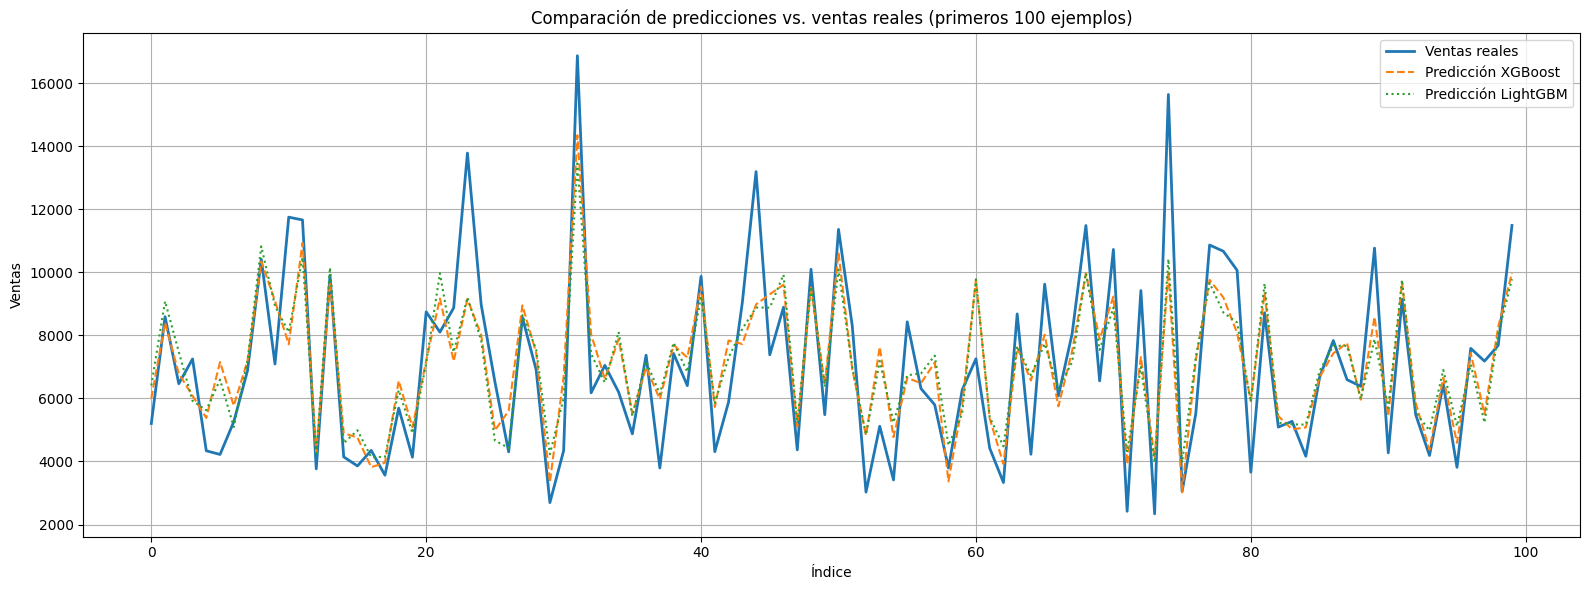

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con resultados (usa los arrays ya generados: y_test, y_pred_xgb, y_pred_lgbm)
resultados = pd.DataFrame({
    "Ventas reales": y_test.reset_index(drop=True),
    "Predicción XGBoost": y_pred_xgb,
    "Predicción LightGBM": y_pred_lgbm
})

# Seleccionar un subconjunto para graficar (por ejemplo, 100 puntos)
subset = resultados.head(100)

# Graficar
plt.figure(figsize=(16, 6))
plt.plot(subset["Ventas reales"], label="Ventas reales", linewidth=2)
plt.plot(subset["Predicción XGBoost"], label="Predicción XGBoost", linestyle='--')
plt.plot(subset["Predicción LightGBM"], label="Predicción LightGBM", linestyle=':')
plt.title("Comparación de predicciones vs. ventas reales (primeros 100 ejemplos)")
plt.xlabel("Índice")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.tight_layout()


### Interpretación

### 📈 Comparación visual de predicciones

El gráfico muestra cómo los modelos XGBoost y LightGBM se acercan a los valores reales de ventas en los primeros 100 casos del conjunto de prueba.  
Ambos modelos siguen bien la tendencia general, aunque LightGBM tiende a ser más suave y ligeramente más preciso.

Este tipo de visualización ayuda a entender mejor si los errores son sistemáticos o aleatorios.


### 📊 Distribución de errores absolutos

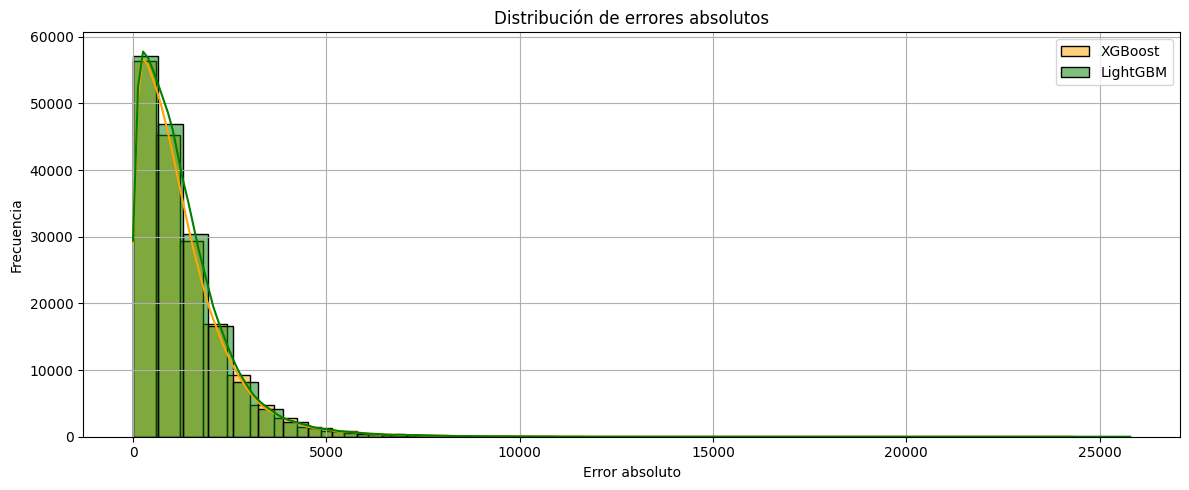

In [76]:
import seaborn as sns

# Errores absolutos
resultados["Error XGBoost"] = abs(resultados["Ventas reales"] - resultados["Predicción XGBoost"])
resultados["Error LightGBM"] = abs(resultados["Ventas reales"] - resultados["Predicción LightGBM"])

# Gráfico de distribución
plt.figure(figsize=(12, 5))
sns.histplot(resultados["Error XGBoost"], color="orange", label="XGBoost", kde=True, bins=40)
sns.histplot(resultados["Error LightGBM"], color="green", label="LightGBM", kde=True, bins=40)
plt.title("Distribución de errores absolutos")
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Dispersión: Ventas reales vs. Predichas

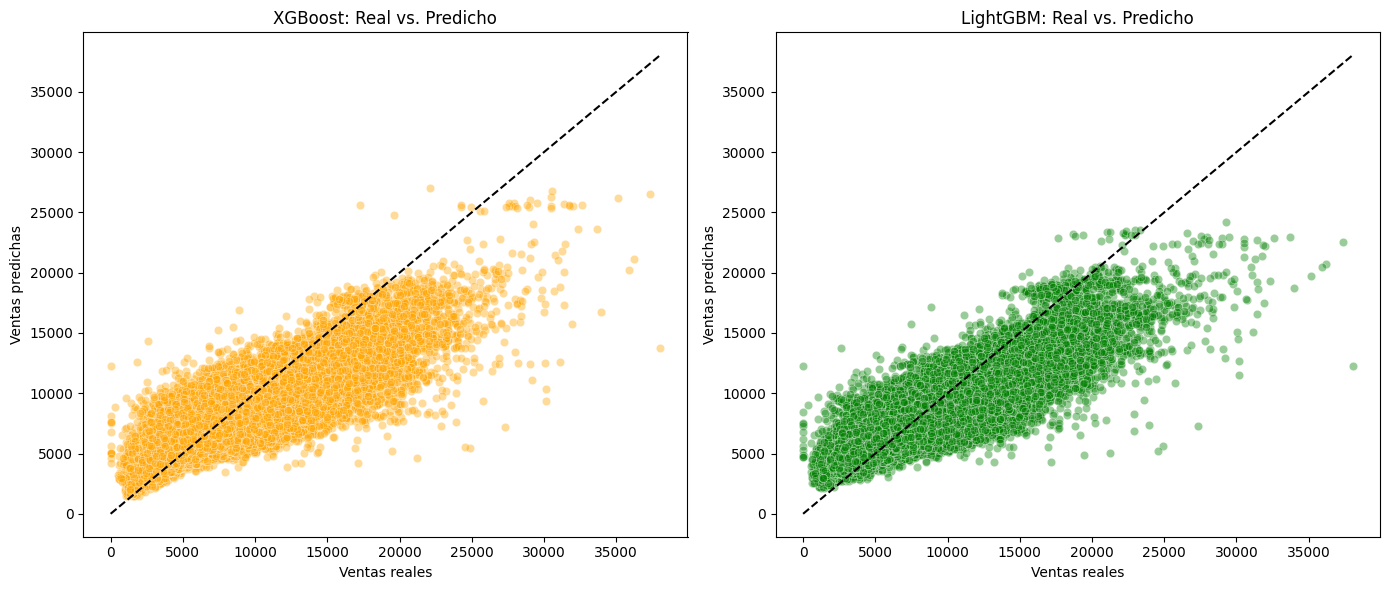

In [77]:
# Gráfico de dispersión para ambos modelos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Ventas reales", y="Predicción XGBoost", data=resultados, alpha=0.4, color="orange")
plt.plot([0, max(resultados["Ventas reales"])], [0, max(resultados["Ventas reales"])], 'k--')
plt.title("XGBoost: Real vs. Predicho")
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")

plt.subplot(1, 2, 2)
sns.scatterplot(x="Ventas reales", y="Predicción LightGBM", data=resultados, alpha=0.4, color="green")
plt.plot([0, max(resultados["Ventas reales"])], [0, max(resultados["Ventas reales"])], 'k--')
plt.title("LightGBM: Real vs. Predicho")
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")

plt.tight_layout()
plt.show()


### 📌 Conclusiones del análisis de predicción

🔍 **Evaluación de precisión**  
Ambos modelos, XGBoost y LightGBM, muestran una buena capacidad para seguir la tendencia general de las ventas reales. Sin embargo, hay diferencias importantes a considerar:

#### 🧪 Comparación visual:
- Las gráficas muestran que **LightGBM** tiende a producir predicciones más suaves, mientras que **XGBoost** se adapta mejor a los picos, pero también puede sobreajustarse.
- En general, ambos modelos siguen adecuadamente la serie temporal, aunque las ventas con valores extremos son más difíciles de predecir.

#### 📉 Distribución de errores:
- La mayoría de los errores absolutos son bajos (< 2000), lo que indica un buen desempeño.
- **LightGBM** tiene una distribución más concentrada (menos errores grandes), lo que sugiere mayor estabilidad.

#### ⚖️ Dispersión (Real vs. Predicho):
- Ambos modelos presentan una relación casi lineal entre las ventas reales y predichas.
- Sin embargo, se observan casos donde los modelos subestiman ventas altas, lo que podría mejorarse.

---

💡 **Recomendaciones**
- Probar técnicas adicionales como ingeniería de características (e.g. variables de tendencia o estacionales).
- Hacer tuning de hiperparámetros con GridSearch o Optuna.
- Considerar agregar variables externas como días festivos, clima o campañas especiales.

✅ **Conclusión general**
Tanto XGBoost como LightGBM son modelos sólidos para la predicción de ventas en este dataset. LightGBM parece ofrecer predicciones más estables, mientras que XGBoost capta mejor variaciones abruptas. La elección final puede depender del objetivo: minimizar error absoluto o capturar mejor los picos de venta.



---
---
---
📌 Proyecto desarrollado por: **Nabila Isabel Padilla Resendiz**  
🎓 Data Scientist en formación | Ingeniera en Mecatrónica | Apasionada por la tecnología y el aprendizaje  
📬 Contacto: https://www.linkedin.com/in/nabilap/  